In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def viewImage(image):
    #cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2_imshow(image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

def grayscale_17_levels (image):
    high = 255
    while(True):
        low = high - 15
        col_to_be_changed_low = np.array([low])
        col_to_be_changed_high = np.array([high])
        curr_mask = cv2.inRange(gray, col_to_be_changed_low,col_to_be_changed_high)
        gray[curr_mask > 0] = (high)
        high -= 15
        if(low == 0 ):
            break

def get_area_of_each_gray_level(im):

## convert image to gray scale (must br done before contouring)
    image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    output = []
    high = 255
    first = True
    while(True):

        low = high - 15
        if(first == False):

            ## making values that are of a greater gray level black
            ## so it won't get detected
            to_be_black_again_low = np.array([high])
            to_be_black_again_high = np.array([255])
            curr_mask = cv2.inRange(image, to_be_black_again_low,
            to_be_black_again_high)
            image[curr_mask > 0] = (0)

        # making values of this gray level white so we can calculate
        # it's area
        ret, threshold = cv2.threshold(image, low, 255, 0)
        contours, hirerchy = cv2.findContours(threshold,
        cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

        if(len(contours) > 0):
            output.append([cv2.contourArea(contours[0])])
            cv2.drawContours(im, contours, -1, (0,0,255), 3)

        high -= 15
        first = False
        if(low == 0 ):
          break
    return output

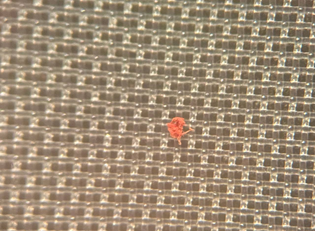

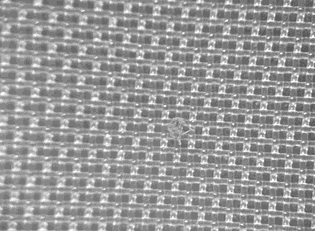

In [ ]:
image = cv2.imread('micro.png')
viewImage(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_17_levels(gray)
viewImage(gray)

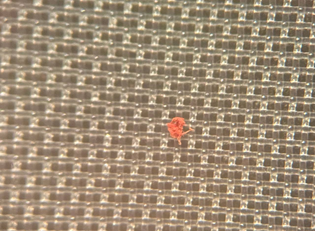

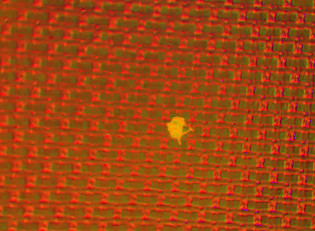

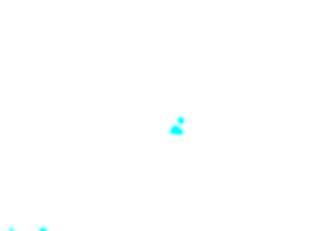

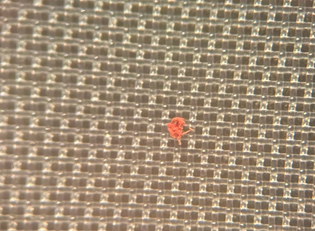

In [ ]:
import cv2
import numpy as np

# load image
img = cv2.imread('micro.png')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
#result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(mask)
cv2_imshow(result)

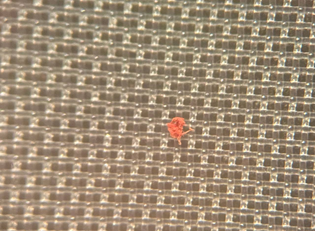

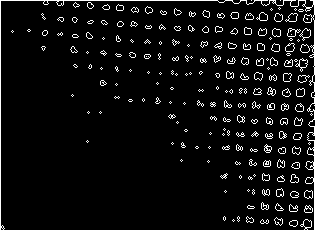

In [ ]:
import cv2
import numpy as np

my_photo = cv2.imread('micro.png')
#filterd_image  = cv2.medianBlur(my_photo,7)
img_grey = cv2.cvtColor(my_photo,cv2.COLOR_BGR2GRAY)

#set a thresh
thresh = 100

#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.uint8(np.zeros((my_photo.shape[0],my_photo.shape[1])))

cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2_imshow(my_photo) # выводим итоговое изображение в окно
cv2_imshow(img_contours) # выводим итоговое изображение в окно

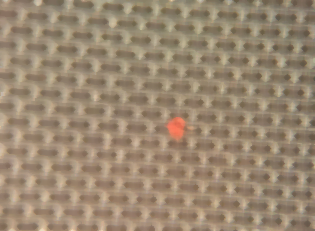

In [ ]:
filtered_img = cv2.medianBlur(my_photo,7)
cv2_imshow(filtered_img)

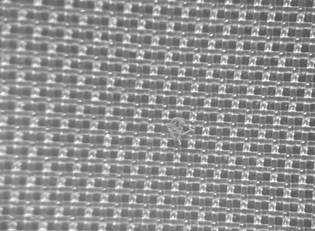

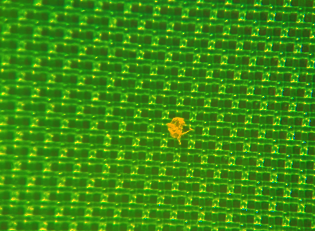

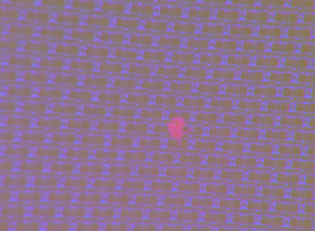

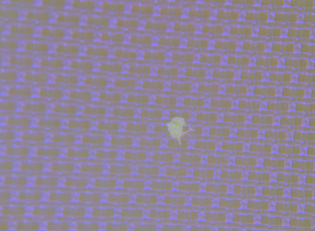

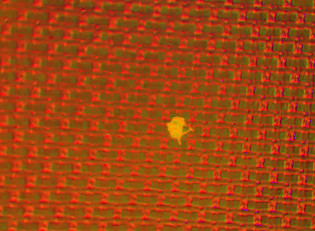

In [ ]:
img = cv2.imread('micro.png')
color_spaces = [cv2.COLOR_BGR2GRAY, cv2.COLOR_BGR2HLS, cv2.COLOR_BGR2YUV, cv2.COLOR_BGR2LAB]
for cs in color_spaces:
  cv2_imshow(cv2.cvtColor(img, cs))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(hsv)

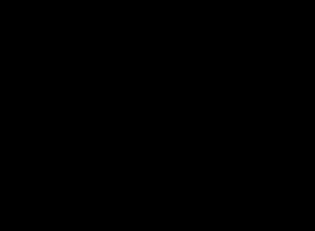

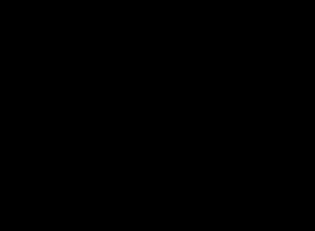

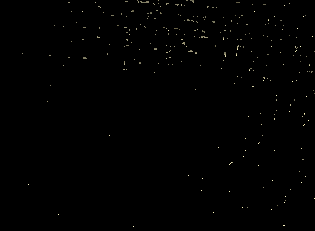

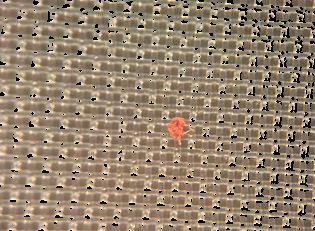

In [ ]:
frame = img
hsv_frame = hsv

# Red color
low_red = np.array([161, 155, 84])
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(frame, frame, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(frame, frame, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(frame, frame, mask=mask)

 yellow = np.uint8([[[0,236,236]]])
 hsv_yellow =
 # define range of blue color in HSV
 lower_yellow = np.array(cv2.cvtColor(l,cv2.COLOR_BGR2HSV))
 upper_yellow = np.array( cv2.cvtColor(u,cv2.COLOR_BGR2HSV))```

with_filters = [red, blue, green, result]
for i in with_filters:
  cv2_imshow(i)

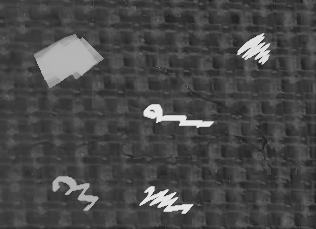

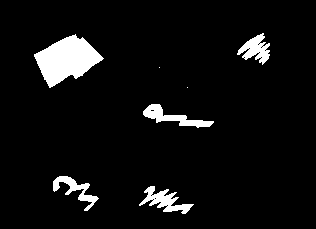

Color: Unknown


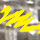

(244.3014827018122, 231.67710049423394, 14.225700164744646)


Color: Unknown


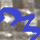

(69.33739837398375, 77.29065040650407, 200.77439024390247)


Color: Unknown


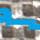

(15.141914191419142, 160.3927392739274, 222.7953795379538)


Color: Unknown


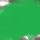

(42.50310262529833, 173.37756563245824, 79.96801909307877)


Color: Red


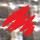

(229.3159851301115, 36.30855018587361, 43.001858736059475)


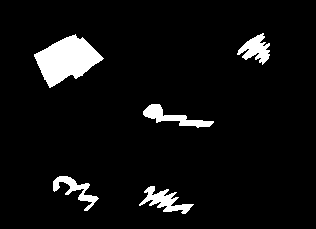

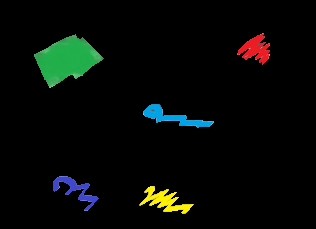

In [8]:
import cv2
import numpy as np
from skimage import measure
from scipy import ndimage

def determine_color_category(mean_color):
    # Пример: определение категории цвета на основе среднего цвета
    # Можно дополнительно настроить для определения цвета на основе RGB-значений
    if mean_color[0] > 200 and mean_color[1] < 50 and mean_color[2] < 50:
        return "Red"
    elif mean_color[0] < 50 and mean_color[1] > 200 and mean_color[2] < 50:

        return "Green"
    elif mean_color[0] < 50 and mean_color[1] < 50 and mean_color[2] > 200:
        return "Blue"
    else:
        return "Unknown"

# Функция для обнаружения и анализа частиц микропластика
def analyze_microplastic(image_path):
    # Загрузка изображения
    img = cv2.imread(image_path)

    # Преобразование изображения в оттенки серого
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    # Apply thresholding

    # Бинаризация изображения
    _, binary = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
    cv2_imshow(binary)

    # Избавление от шумов
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, np.ones((1, 1), np.uint8))

    # Нахождение контуров
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Создание маски для частиц
    particle_mask = np.zeros_like(gray)

    # Параметры для анализа частиц
    min_particle_area = 50  # Минимальная площадь частицы
    max_particle_area = 5000  # Максимальная площадь частицы

    # Анализ каждого контура
    for contour in contours:
        area = cv2.contourArea(contour)

        if min_particle_area < area < max_particle_area:
            cv2.drawContours(particle_mask, [contour], -1, 255, thickness=cv2.FILLED)

            # Извлечение свойств частицы (размер, центр, геометрическая категория и т.д.)
            moments = cv2.moments(contour)
            cx = int(moments['m10'] / moments['m00'])
            cy = int(moments['m01'] / moments['m00'])

            # Получение вырезанного изображения частицы
            #!!! если частица на краю изображения - выдаст ошибку
            particle_image = img[cy - 20:cy + 20,
                             cx - 20:cx + 20]  # Пример: вырезать 40x40 область вокруг центра частицы

            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
            # Цвет частицы (определение категории цвета на основе среднего цвета внутри контура)
            mean_color = cv2.mean(img, mask=mask)[:-1][::-1]  # OpenCV возвращает BGRA, переворачиваем в RGB
            color_category = determine_color_category(mean_color)
            # Вывод результатов
            print(f"Color: {color_category}")
            cv2_imshow(particle_image)
            blank_image = np.zeros((10,10,3), np.uint8)
            blank_image[::] = (mean_color[2], mean_color[1], mean_color[0])
            print(mean_color)
            cv2_imshow(blank_image)

    return particle_mask


# Пример использования
input_image_path = "micro111.png"
particle_mask = analyze_microplastic(input_image_path)

# Сохранение результата
cv2.imwrite("particle_mask.png", particle_mask)
cv2_imshow(particle_mask)

img = cv2.imread(input_image_path)
src1_mask=cv2.cvtColor(particle_mask,cv2.COLOR_GRAY2BGR)
mask_out=cv2.subtract(img,src1_mask)
mask_out=cv2.subtract(img,mask_out)
cv2_imshow(mask_out)

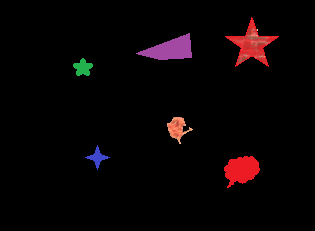